In [47]:
using JuMP
# using Ipopt
# using NLopt
using KNITRO
using Plots

function lp1(c)
    # set Ipopt to be the solver
    lpRatio = Model(KNITRO.Optimizer)

    # set step size
    # step = 1//n
    # initial variables
    @variable(lpRatio, ratio >= 0, start = 1)
    @objective(lpRatio, Max, ratio)
    # @variable(lpRatio, f[0:n] >= 0)
    # @variable(lpRatio, fr[0:n] >= 0)
    @variable(lpRatio, a >= 0)
    @variable(lpRatio, 0 <= ta <= 1)
    @variable(lpRatio, 0 <= tc <= 1)
    @NLobjective(lpRatio, Max, ratio)
    @NLconstraints(lpRatio,
    begin
        a <= c
        ta >= tc
        # a >= 1
        ratio <= (
               tc * log(1/tc)
               + a/c * (ta - tc - tc * log(ta/tc))
               + 1/c * (1-ta)
               + (-ta/c + a*ta/c - a*tc/c) * log(1/ta)
        )
        ratio <= (
                ta * log(1/ta)
                + 1/a * (1 - ta - ta * log(1/ta))
        )
    end
    )
    status = optimize!(lpRatio)
    println("Objective value: ", objective_value(lpRatio),";",value(tc),";",value(a),";", value(ta))
    return objective_value(lpRatio)
end

function lp2(n,c)
    # set KNITRO to be the solver
    lpRatio = Model(KNITRO.Optimizer)

    # set step size
    step = 1//n
    # initial variables
    @variable(lpRatio, ratio >= 0, start = 1)
    @objective(lpRatio, Max, ratio)
    # @variable(lpRatio, f[0:n] >= 0)
    # @variable(lpRatio, fr[0:n] >= 0)
    @variable(lpRatio, x[0:n] >= 0)
    @variable(lpRatio, 0 <= t[0:n] <= 1)
    @NLobjective(lpRatio, Max, ratio)
    fix(x[n],1;  force = true)
    fix(x[0],c;  force = true)
    fix(t[n],1;  force = true)
    @NLconstraints(lpRatio,
    begin
        [i = 0:n-1] , x[i+1] <= x[i]
        [i = 0:n-1] , t[i+1] >= t[i]
        [a = 0:n-1] , ratio <= (
            t[a] * log(1/t[a])
            + 1/x[a] * (
                sum(
                log(t[i]/t[i-1])*(
                    sum((t[j]-t[j-1])*x[j] for j = a+1:i-1
                )
                - t[i-1]*x[i])
                + x[i] * (t[i] - t[i-1])
                for i = a+1:n)
            )
        )
    end
    )
    # print(lpRatio)
    status = optimize!(lpRatio)
    println("Objective value: ", objective_value(lpRatio), value.(x) , value.(t))
    return objective_value(lpRatio)
end
function lp(n,c)
    n = n - 1
    # set KNITRO to be the solver
    lpRatio = Model(KNITRO.Optimizer)

    # initial variables
    @variable(lpRatio, ratio >= 0, start = 1)
    @objective(lpRatio, Max, ratio)
    # @variable(lpRatio, f[0:n] >= 0)
    # @variable(lpRatio, fr[0:n] >= 0)
    @variable(lpRatio, x[0:n] >= 0)
    @variable(lpRatio, 0 <= t[0:n] <= 1)
    @NLobjective(lpRatio, Max, ratio)
    fix(x[n],1;  force = true)
    fix(x[0],c;  force = true)
    fix(t[n],1;  force = true)
    @NLconstraints(lpRatio,
    begin
        [i = 0:n-1] , x[i+1] <= x[i]
        [i = 0:n-1] , t[i+1] >= t[i]
        [a = 0:n-1] , ratio <= (
            t[a] * log(1/t[a])
            + 1/x[a] * (
                sum(
                x[i]*(-t[i] * log(t[i]) + t[i] + t[i-1] * log(t[i-1]) - t[i-1])
                for i = a+1:n)
            )
        )
    end
    )
    # print(lpRatio)
    status = optimize!(lpRatio)
    println("Objective value: ", objective_value(lpRatio), value.(x) , value.(t))
    return objective_value(lpRatio)
end
function lprf(n,c)
    n = n - 1
    # set KNITRO to be the solver
    lpRatio = Model(KNITRO.Optimizer)

    # initial variables
    @variable(lpRatio, ratio >= 0, start = 1)
    @objective(lpRatio, Max, ratio)
    # @variable(lpRatio, f[0:n] >= 0)
    # @variable(lpRatio, fr[0:n] >= 0)
    @variable(lpRatio, x[0:n] >= 0)
    @variable(lpRatio, 0 <= t[0:n] <= 1)
    @NLobjective(lpRatio, Max, ratio)
    fix(x[n],1;  force = true)
    fix(x[0],c;  force = true)
    fix(t[n],1;  force = true)
    @NLconstraints(lpRatio,
    begin
        [i = 0:n-1] , x[i+1] <= x[i]
        [i = 0:n-1] , t[i+1] >= t[i]
        [a = 0:n-1] , ratio <= (
            t[a] * log(1/t[a])
            + 1/x[a] * (
                sum(
                x[i]*(-t[i] * log(t[i]) + t[i] + t[i-1] * log(t[i-1]) - t[i-1])
                for i = a+1:n)
            )
        )
    end
    )
    # print(lpRatio)
    status = optimize!(lpRatio)
    rx = []
    ry = []
    for i = 1:n
        push!(rx,value.(t)[i-1])
    end
    for i = 1:n
        push!(ry,value.(x)[i-1])
    end
    return rx,ry
end

lprf (generic function with 1 method)

In [48]:
res10 = []
for c = 1:100 
    push!(res10, lp(10,c))
end
res2 = []
for c = 1:100 
    push!(res2, lp(2,c))
end
res3 = []
for c = 1:100 
    push!(res3, lp(3,c))
end


            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (20 variables).
Knitro fixing 3 variables eliminated from the presolve.

Problem Characteristics                                 (   Presolved)
-----------------------
Objective goal:  Maximize
Objective type:  general
Number of variables:                                 21 (          18)
    bounded below only:                               9 (         

 0.1347166573129455
 0.17709280226085272
 0.21822422477822764
 0.2587959568437389
 0.2995295942288808
 0.34121780245539696
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (20 variables).
Knitro fixing 3 variables eliminated from the presolve.

Problem Characteristics                                 (   Presolved)
-----------------------
Objective goal:  Maximize
Objective type:  general
Number of

 0.26582747914789046
 0.3114599388553728
 0.3579600222664353
 0.4071460297667427
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (20 variables).
Knitro fixing 3 variables eliminated from the presolve.

Problem Characteristics                                 (   Presolved)
-----------------------
Objective goal:  Maximize
Objective type:  general
Number of variables:                               

 0.1317294524715289
 0.18696014851687687
 0.23710299155774428
 0.284512153561682
 0.3312359806518083
 0.37933678749275823
 0.43130451842000617
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (20 variables).
Knitro fixing 3 variables eliminated from the presolve.

Problem Characteristics                                 (   Presolved)
-----------------------
Objective goal:  Maximize
Objective type

 0.44452473752593913
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (20 variables).
Knitro fixing 3 variables eliminated from the presolve.

Problem Characteristics                                 (   Presolved)
-----------------------
Objective goal:  Maximize
Objective type:  general
Number of variables:                                 21 (          18)
    bounded below only:                 

 0.1468863852860869
 0.20406783579023238
 0.2548879713143488
 0.30250074205666644
 0.3495190701066238
 0.3985869755121147
 0.45307656757305265
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (20 variables).
Knitro fixing 3 variables eliminated from the presolve.

Problem Characteristics                                 (   Presolved)
-----------------------
Objective goal:  Maximize
Objective type

  9.304948192853278
  6.903620830221565
  4.9834844104344596
  3.501643946596736
  2.3908483521130846
  1.579251967985754
  1.01-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:9
And data, a 10-element Array{Float64,1}:
 0.0012340323408537304
 0.08290096929865257
 0.15197711764537813
 0.2095530192591892
 0.2603630692669665
 0.30783002496894707
 0.35474933292813166
 0.40395889894924797
 0.45915013030372104
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro ch

 0.1561781589347318
 0.21398339717277035
 0.2647026494409922
 0.3119772674461946
 0.35874857618196254
 0.40801215911055866
 0.46372986119649023
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (20 variables).
Knitro fixing 3 variables eliminated from the presolve.

Problem Characteristics                                 (   Presolved)
-----------------------
Objective goal:  Maximize
Objective typ

 0.46733037629625884
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (20 variables).
Knitro fixing 3 variables eliminated from the presolve.

Problem Characteristics                                 (   Presolved)
-----------------------
Objective goal:  Maximize
Objective type:  general
Number of variables:                                 21 (          18)
    bounded below only:                 

 12.769748484391407
  9.092172559951665
  6.274370137542718
  4.198205863634059
  2.7174030316300417
  1.6915542510959443
  1.01-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:9
And data, a 10-element Array{Float64,1}:
 0.002512183793868673
 0.09138755593297308
 0.16285022603337307
 0.22084600068583496
 0.27127791147926583
 0.3181247544167502
 0.3645486582401209
 0.413789530733881
 0.4702495258005464
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changi

 13.862311087576384
  9.765071675936415
  6.660518062689474
  4.400507018693084
  2.809287041763471
  1.7220960130283867
  1.01-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:9
And data, a 10-element Array{Float64,1}:
 0.002951637756555817
 0.0936255871998225
 0.16558849370917014
 0.22360257028436015
 0.2738688520417638
 0.3205001346527219
 0.3667447726677525
 0.41594031800680265
 0.4726728682366211
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changin

  4.591725941158017
  2.8950453350995886
  1.7502189714969325
  1.01-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:9
And data, a 10-element Array{Float64,1}:
 0.003391132129614648
 0.0956627573732442
 0.1680378275620602
 0.22603959061469547
 0.2761355462441971
 0.3225557296411321
 0.3686232637852376
 0.4177615755893854
 0.474722653778136
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to sati

 0.2282195576434406
 0.27814422401373834
 0.3243594473712909
 0.3702539382556893
 0.41932748504193273
 0.4764830223618945
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (20 variables).
Knitro fixing 3 variables eliminated from the presolve.

Problem Characteristics                                 (   Presolved)
-----------------------
Objective goal:  Maximize
Objective type:  general
Number of 

  7.726300830183484
  4.946679634950459
  3.0516132758034047
  1.8006614976705893
  1.01-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:9
And data, a 10-element Array{Float64,1}:
 0.0042622645893149805
 0.09926266923683874
 0.17227057602638257
 0.2301888123435248
 0.27994340929442857
 0.3259605255764203
 0.37168696190861883
 0.4206910336014789
 0.4780140421453943
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro sh

 25.432970841499824
 18.00819040933845
 12.25947735365757
  8.056469736328548
  5.11259373133436
  3.123700580251776
  1.823514238538341
  1.01-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:9
And data, a 10-element Array{Float64,1}:
 0.004691397266111077
 0.10087153419413146
 0.17412470176496395
 0.2319821088321842
 0.28156924664465227
 0.3273953837208751
 0.3729592032677899
 0.42189100709308225
 0.47935974846739
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.

 12.843513061044536
  8.376237754760343
  5.2719282756252195
  3.192309305107899
  1.8450562721025472
  1.01-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:9
And data, a 10-element Array{Float64,1}:
 0.005114856013017114
 0.1023755120855898
 0.17583802582512342
 0.2336264325869946
 0.28304952962475477
 0.3286917890541015
 0.3740985644061804
 0.42295660958174675
 0.48055329422832205
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from A

 38.763857000318474
 28.55595821982554
 19.973911638912394
 13.414516853931996
  8.68656191879727
  5.425341877648705
  3.257816676934339
  1.8654411268367845
  1.01-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:9
And data, a 10-element Array{Float64,1}:
 0.005533195678487782
 0.10378846269761671
 0.17743030938492185
 0.23514365311701946
 0.28440648700551235
 0.3298716971384277
 0.37512688013564544
 0.42391050214580844
 0.4816202937289228
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing 

 0.3757590672509675
 0.42449306564900874
 0.48227126387771835
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (20 variables).
Knitro fixing 3 variables eliminated from the presolve.

Problem Characteristics                                 (   Presolved)
-----------------------
Objective goal:  Maximize
Objective type:  general
Number of variables:                                 21 (          18)

 53.0
 42.56804004032987
 31.116345034025258
 21.568048413739746
 14.340069787368238
  9.185012218845838
  5.669382942366274
  3.360955086186772
  1.897185643918358
  1.01-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:9
And data, a 10-element Array{Float64,1}:
 0.006216542946033043
 0.10596773530504526
 0.1798548854519923
 0.23743419982845054
 0.2864390351016924
 0.3316237055975203
 0.37663803348730623
 0.4252978413941156
 0.48316950535178704
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro chang

  3.419630605665983
  1.91506002689725
  1.01-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:9
And data, a 10-element Array{Float64,1}:
 0.006618170080105394
 0.10718377862206471
 0.18119178457562146
 0.23868716890744132
 0.287542742177133
 0.33256727509590567
 0.3774438028739296
 0.4260300704217251
 0.48398571633151644
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bound

  5.945530171404691
  3.476162151970432
  1.932158215949251
  1.01-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:9
And data, a 10-element Array{Float64,1}:
 0.007013489111179793
 0.10833963287706917
 0.18245218365677332
 0.2398620135595895
 0.2885724308124317
 0.33344256227142793
 0.3781860332439833
 0.4266996286415648
 0.48473107423671685
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to sa

 24.35123840684819
 15.934589579098395
 10.03155500775487
  6.07761149814648
  3.5307292914000494
  1.9485504142143248
  1.01-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:9
And data, a 10-element Array{Float64,1}:
 0.007402539722670722
 0.1094410627042895
 0.18364409969874226
 0.24096736136301736
 0.28953663249533995
 0.33425776906487564
 0.3788726769580517
 0.42731462157668676
 0.48541475669362205
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changi

 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (20 variables).
Knitro fixing 3 variables eliminated from the presolve.

Problem Characteristics                                 (   Presolved)
-----------------------
Objective goal:  Maximize
Objective type:  general
Number of variables:                                 21 (          18)
    bounded below only:                               9 (    

 0.29101688549411786
 0.3355009128400241
 0.3799109184518139
 0.4282360077109155
 0.4864372198003284
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (20 variables).
Knitro fixing 3 variables eliminated from the presolve.

Problem Characteristics                                 (   Presolved)
-----------------------
Objective goal:  Maximize
Objective type:  general
Number of variables:           


            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (20 variables).
Knitro fixing 3 variables eliminated from the presolve.

Problem Characteristics                                 (   Presolved)
-----------------------
Objective goal:  Maximize
Objective type:  general
Number of variables:                                 21 (          18)
    bounded below only:                               9 (         


            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (20 variables).
Knitro fixing 3 variables eliminated from the presolve.

Problem Characteristics                                 (   Presolved)
-----------------------
Objective goal:  Maximize
Objective type:  general
Number of variables:                                 21 (          18)
    bounded below only:                               9 (         

 76.0
 59.813779677436166
 42.49895952565263
 28.497523519861627
 18.26588384178704
 11.24465641385476
  6.650274686366583
  3.7635673014188997
  2.0173170905734787
  1.01-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:9
And data, a 10-element Array{Float64,1}:
 0.009137645919369747
 0.11399011821026746
 0.18847636784794783
 0.24539354590344248
 0.2933535069997176
 0.33744235129779293
 0.3815101038409445
 0.4296335144230158
 0.4879831209389039
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro chang

  2.03064272381715
  1.01-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:9
And data, a 10-element Array{Float64,1}:
 0.009493064975512415
 0.11486033644695755
 0.18938498643215773
 0.2462163063893814
 0.29405543865225037
 0.33802066492377086
 0.38198105497588314
 0.43003971834632854
 0.48843127927477364
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (20 variables).

 82.0
 64.25504214104696
 45.38025700336835
 30.21703165950801
 19.219002667613868
 11.73309166940728
  6.877128684360522
  3.8542215499861436
  2.043599627653473
  1.01-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:9
And data, a 10-element Array{Float64,1}:
 0.009842643343142539
 0.11569831408401753
 0.19025509123730633
 0.24700108549543243
 0.2947224097199774
 0.33856768080676425
 0.38242407374497445
 0.4304193559539124
 0.48884936288471664
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro chang

 0.4891142168125688
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (20 variables).
Knitro fixing 3 variables eliminated from the presolve.

Problem Characteristics                                 (   Presolved)
-----------------------
Objective goal:  Maximize
Objective type:  general
Number of variables:                                 21 (          18)
    bounded below only:                  

 0.33942192633306306
 0.3831112742855388
 0.4310035033379119
 0.4894915445836558
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (20 variables).
Knitro fixing 3 variables eliminated from the presolve.

Problem Characteristics                                 (   Presolved)
-----------------------
Objective goal:  Maximize
Objective type:  general
Number of variables:                               

 0.010749150954439242
 0.11779780049429256
 0.1924158683635329
 0.2489386545084128
 0.2963600579502457
 0.3399019393536636
 0.3834947562045994
 0.4313268908057928
 0.4898466115672003
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (20 variables).
Knitro fixing 3 variables eliminated from the presolve.

Problem Characteristics                                 (   Presolved)
-----------------------


Objective value: 0.42627898959135831-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:9
And data, a 10-element Array{Float64,1}:
 93.0
 72.34537788678936
 50.584754521203564
 33.29308092418252
 20.906177096716064
 12.588038325019703
  7.269512640794665
  4.009060398461619
  2.087891289665341
  1.01-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:9
And data, a 10-element Array{Float64,1}:
 0.011079850713591327
 0.11853943185028734
 0.19317269270577558
 0.2496134892126216
 0.2969275564115799
 0.3403615031843423
 0.3838603075852005
 0.431633254145285
 0.49018208506407335
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.


 0.43182801798146353
 0.49039523284952735
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (20 variables).
Knitro fixing 3 variables eliminated from the presolve.

Problem Characteristics                                 (   Presolved)
-----------------------
Objective goal:  Maximize
Objective type:  general
Number of variables:                                 21 (          18)
    bounded below o

 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (20 variables).
Knitro fixing 3 variables eliminated from the presolve.

Problem Characteristics                                 (   Presolved)
-----------------------
Objective goal:  Maximize
Objective type:  general
Number of variables:                                 21 (          18)
    bounded below only:                               9 (    

    Dimension 1, 0:1
And data, a 2-element Array{Float64,1}:
 1.1647362724629242e-7
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (4 variables).
Knitro fixing 3 variables eliminated from the presolve.

Problem Characteristics                                 (   Presolved)
-----------------------
Objective goal:  Maximize
Objective type:  general
Number of variables:                             

Objective value: 0.44769785368509881-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:1
And data, a 2-element Array{Float64,1}:
 4.0
 1.01-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:1
And data, a 2-element Array{Float64,1}:
 0.26359713811628066
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (4 variables).
Knitro fixing 3 variables e

Objective value: 0.404043607184294441-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:1
And data, a 2-element Array{Float64,1}:
 8.0
 1.01-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:1
And data, a 2-element Array{Float64,1}:
 0.3189064945982359
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (4 variables).
Knitro fixing 3 variables e

Objective value: 0.38935294971757691-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:1
And data, a 2-element Array{Float64,1}:
 13.0
  1.01-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:1
And data, a 2-element Array{Float64,1}:
 0.3384653966787749
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (4 variables).
Knitro fixing 3 variables 

Objective value: 0.38514439807440871-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:1
And data, a 2-element Array{Float64,1}:
 16.0
  1.01-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:1
And data, a 2-element Array{Float64,1}:
 0.34415376825243776
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (4 variables).
Knitro fixing 3 variables

Objective value: 0.382315086530999271-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:1
And data, a 2-element Array{Float64,1}:
 19.0
  1.01-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:1
And data, a 2-element Array{Float64,1}:
 0.34799902812779665
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (4 variables).
Knitro fixing 3 variable

Objective value: 0.37921812220823671-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:1
And data, a 2-element Array{Float64,1}:
 24.0
  1.01-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:1
And data, a 2-element Array{Float64,1}:
 0.35222740331565033
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (4 variables).
Knitro fixing 3 variables

Objective value: 0.37792502457570381-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:1
And data, a 2-element Array{Float64,1}:
 27.0
  1.01-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:1
And data, a 2-element Array{Float64,1}:
 0.35399887257667667
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (4 variables).
Knitro fixing 3 variables

Objective value: 0.37689666824121671-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:1
And data, a 2-element Array{Float64,1}:
 30.0
  1.01-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:1
And data, a 2-element Array{Float64,1}:
 0.35541016373718465
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (4 variables).
Knitro fixing 3 variables

Objective value: 0.376059302116237841-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:1
And data, a 2-element Array{Float64,1}:
 33.0
  1.01-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:1
And data, a 2-element Array{Float64,1}:
 0.35656097962074496
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (4 variables).
Knitro fixing 3 variable

Excessive output truncated after 524413 bytes.


  1.01-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:1
And data, a 2-element Array{Float64,1}:
 0.35689879241054023
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (4 variables).
Knitro fixing 3 variables eliminated from the presolve.

Problem Characteristics                                 (   Presolved)
-----------------------
Objective goal:  Maximize
Objective

In [49]:
resx = []
for c = 1:100
    push!(resx , 1/(1+log(c)))
end

In [50]:
res_sm_10 = []
for c = 1:0.1:10 
        push!(res_sm_10, lp(10,c))
    end
res_sm_2 = []
for c = 1:0.1:10 
    push!(res_sm_2, lp(2,c))
end
res_sm_3 = []
for c = 1:0.1:10 
    push!(res_sm_3, lp(3,c))
end


            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (20 variables).
Knitro fixing 3 variables eliminated from the presolve.

Problem Characteristics                                 (   Presolved)
-----------------------
Objective goal:  Maximize
Objective type:  general
Number of variables:                                 21 (          18)
    bounded below only:                               9 (         

 1.275059764260387
 1.2446642230150609
 1.2120415008646293
 1.1780616650405193
 1.143195735246064
 1.1077544532808534
 1.0719641276853227
 1.0359993346726946
 1.01-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:9
And data, a 10-element Array{Float64,1}:
 4.50892411542026e-8
 0.016218006437231477
 0.034834091482601456
 0.05400355051789862
 0.07337310571975146
 0.09281560722068544
 0.11228438097774948
 0.13177000984283405
 0.15128319146879757
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing

 0.10975837013990265
 0.13781085407191862
 0.16571366556868541
 0.1935658019208658
 0.22149323395859902
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (20 variables).
Knitro fixing 3 variables eliminated from the presolve.

Problem Characteristics                                 (   Presolved)
-----------------------
Objective goal:  Maximize
Objective type:  general
Number of variables:        

 0.09936497570036869
 0.13287786344089694
 0.1659121560821909
 0.19865533753935957
 0.23134489184386184
 0.2642506796444129
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (20 variables).
Knitro fixing 3 variables eliminated from the presolve.

Problem Characteristics                                 (   Presolved)
-----------------------
Objective goal:  Maximize
Objective type:  general
Number o

 1.01-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:9
And data, a 10-element Array{Float64,1}:
 5.181164790555767e-7
 0.03561644791501169
 0.0743110717220508
 0.11226687679250975
 0.1492774367738946
 0.18556123166500285
 0.22144971617949852
 0.25732171917974117
 0.29359585096326724
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (20 variables).
Knitro fixing 3 vari

 1.458384605766295
 1.295350663982809
 1.1423909254205282
 1.01-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:9
And data, a 10-element Array{Float64,1}:
 1.5633020076549192e-6
 0.039300254730375545
 0.08138116541738943
 0.12220114214468975
 0.1617067011159647
 0.2002692127344837
 0.23835962481970766
 0.2764923372409231
 0.31523146183794665
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to sa

 2.8
 2.6224261188341687
 2.403545356381695
 2.176817879233459
 1.9526207664129496
 1.7364961766589013
 1.531704129189142
 1.3401407562255996
 1.1627919927949166
 1.01-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:9
And data, a 10-element Array{Float64,1}:
 2.2944803369793103e-6
 0.04237152093983628
 0.08715808848898447
 0.13018306624345116
 0.1715560626076122
 0.2117972555328619
 0.2515090068628248
 0.2913329481686675
 0.3319726118683568
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing 

 2.9751126658591356
 2.6983000299420152
 2.4139134519632894
 2.1357249293079064
 1.8708908364667
 1.623397549119051
 1.395335422003731
 1.1875444429172335
 1.01-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:9
And data, a 10-element Array{Float64,1}:
 4.418205829347307e-6
 0.045803752333716564
 0.0934795879017387
 0.1387680786093644
 0.18200000966393093
 0.22388340924582664
 0.2651819871873849
 0.3066934450460407
 0.34929640481634106
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linese


            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (20 variables).
Knitro fixing 3 variables eliminated from the presolve.

Problem Characteristics                                 (   Presolved)
-----------------------
Objective goal:  Maximize
Objective type:  general
Number of variables:                                 21 (          18)
    bounded below only:                               9 (         

 4.161486534964223e-6
 0.04996751290000248
 0.10096768882396238
 0.14873118025905888
 0.19391324666696777
 0.23747874018913478
 0.2804055777000578
 0.3236989947644626
 0.36847776234746343
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (20 variables).
Knitro fixing 3 variables eliminated from the presolve.

Problem Characteristics                                 (   Presolved)
-------------------

 1.5050180918006948
 1.2355420727739788
 1.01-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:9
And data, a 10-element Array{Float64,1}:
 7.869339534645712e-6
 0.05174530817228478
 0.1040919826645596
 0.15281424090142315
 0.1987235394046661
 0.24290230782721314
 0.2864244276153068
 0.33038836345010314
 0.3760236137138603
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bound

 4.4
 4.021823466848719
 3.558411011561889
 3.0920059130498116
 2.6477662081460926
 2.237646869250661
 1.8671635231829766
 1.5380568767007896
 1.2497078427584278
 1.01-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:9
And data, a 10-element Array{Float64,1}:
 1.0801035942855665e-5
 0.053360999805377396
 0.10689997307573103
 0.15644871824851125
 0.20297007756926996
 0.24765748495979184
 0.2916743573226148
 0.33620633220715385
 0.38258808616904827
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro chan

 1.2631371657416448
 1.01-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:9
And data, a 10-element Array{Float64,1}:
 1.3952034822131398e-5
 0.054843128578410234
 0.10944764593720296
 0.1597161838519999
 0.2067580611510114
 0.25187162990227835
 0.2963040366079281
 0.3413226273899787
 0.38836213896488936
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (20 variables).


 3.416038462624498
 2.887266814888987
 2.4052188620698547
 1.9757610022942054
 1.599943879199499
 1.2759000252579455
 1.01-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:9
And data, a 10-element Array{Float64,1}:
 2.538497491313374e-5
 0.056228869609120685
 0.11179004352468232
 0.16268830754563474
 0.21017463634067848
 0.2556465382008745
 0.3004295038255375
 0.345867527214524
 0.3934905610584937
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing li

 0.05749476149833715
 0.11392810090022645
 0.1653876700344841
 0.2132612529844583
 0.25904057771410427
 0.30412495690904723
 0.3499307676086983
 0.39807904355734697
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (20 variables).
Knitro fixing 3 variables eliminated from the presolve.

Problem Characteristics                                 (   Presolved)
-----------------------
Objective goal:  M

 0.05869013841831736
 0.11591692067137929
 0.16787484040326822
 0.21608391917045575
 0.26212523091437084
 0.3074675036800761
 0.3535953545117236
 0.40221679757717255
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (20 variables).
Knitro fixing 3 variables eliminated from the presolve.

Problem Characteristics                                 (   Presolved)
-----------------------
Objective goal:  

 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (20 variables).
Knitro fixing 3 variables eliminated from the presolve.

Problem Characteristics                                 (   Presolved)
-----------------------
Objective goal:  Maximize
Objective type:  general
Number of variables:                                 21 (          18)
    bounded below only:                               9 (    

 1.3216190706505462
 1.01-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:9
And data, a 10-element Array{Float64,1}:
 5.585474574828949e-5
 0.060872278079963656
 0.11949732384636669
 0.17230456548598522
 0.2210654267790012
 0.26752688476507447
 0.3132851488691406
 0.35995062119066235
 0.409394491810107
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (20 variables).
K

 4.999782606321423
 4.1931672538887
 3.4504843211440255
 2.7909432763518427
 2.2200620628075898
 1.7358071229599126
 1.3319353216777154
 1.01-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:9
And data, a 10-element Array{Float64,1}:
 6.896366581006103e-5
 0.0618760279686914
 0.12112126056439772
 0.1742927488991247
 0.2232814743828315
 0.26991160571945816
 0.31583806150690813
 0.3627293901372203
 0.41253349393712535
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.

 2.8633911604122164
 2.2651450063063865
 1.7604096427888103
 1.341879816228329
 1.01-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:9
And data, a 10-element Array{Float64,1}:
 8.300541000081281e-5
 0.06282834801118288
 0.12264973820126789
 0.17615248216471097
 0.225343291607731
 0.27212008943222543
 0.3181935420923506
 0.36528754520648044
 0.41542378718146344
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifte

 2.9345018795884408
 2.30916731436488
 1.7843009802376744
 1.3514803186883784
 1.01-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:9
And data, a 10-element Array{Float64,1}:
 9.851998833426505e-5
 0.06373541389348017
 0.12409364996717256
 0.1778986085198603
 0.22726909048862678
 0.27417357322586594
 0.3203757406146359
 0.36765225272999175
 0.4180958515527046
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted

    Dimension 1, 0:9
And data, a 10-element Array{Float64,1}:
 0.00011626226396873075
 0.06460299468075253
 0.12546264099657894
 0.1795439916498691
 0.22907446438944148
 0.27609009703446896
 0.32240505972078287
 0.3698463818127636
 0.4205752961675543
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (20 variables).
Knitro fixing 3 variables eliminated from the presolve.

Problem Characteristics    

 1.3697510014116587
 1.01-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:9
And data, a 10-element Array{Float64,1}:
 0.00013111217950208346
 0.06542582359248414
 0.12675715285833722
 0.1810936304072982
 0.23076807480018854
 0.2778814368164134
 0.3242961434057468
 0.371887467679432
 0.42288282988546544
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (20 variables).
K

 8.0
 7.0913171931382255
 5.9932893723362435
 4.932763253911857
 3.9741497594734696
 3.140568623498062
 2.435516594877452
 1.8521734963780323
 1.3784595337656185
 1.01-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:9
And data, a 10-element Array{Float64,1}:
 0.00015126509910431604
 0.06622201498546593
 0.12799489457572527
 0.1825650413006123
 0.23236748606780394
 0.2795653997685979
 0.3260672303569359
 0.37379438362297746
 0.42503816502112224
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changi

 1.8736633883001823
 1.3869135364019551
 1.01-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:9
And data, a 10-element Array{Float64,1}:
 0.0001702600741412361
 0.06698249421787048
 0.12917232542067156
 0.18395900183220848
 0.23387684929929395
 0.28114892769799577
 0.32772777287278304
 0.3755790771701505
 0.4270559888519602
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bo

 0.3772547162271315
 0.4289504632733017
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (20 variables).
Knitro fixing 3 variables eliminated from the presolve.

Problem Characteristics                                 (   Presolved)
-----------------------
Objective goal:  Maximize
Objective type:  general
Number of variables:                                 21 (          18)
    bounded below onl

 5.362067916975385
 4.273416670203745
 3.337003827979921
 2.5543707620254774
 1.9151206330711865
 1.4031062615775363
 1.01-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:9
And data, a 10-element Array{Float64,1}:
 0.0002149713430872942
 0.06842607743027729
 0.1313801654755339
 0.1865519027332653
 0.23666579567872245
 0.2840579545860314
 0.3307635839398755
 0.378831717189446
 0.4307333466161595
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing lins

 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (20 variables).
Knitro fixing 3 variables eliminated from the presolve.

Problem Characteristics                                 (   Presolved)
-----------------------
Objective goal:  Maximize
Objective type:  general
Number of variables:                                 21 (          18)
    bounded below only:                               9 (    

 0.18891313002369586
 0.239186208394284
 0.28666879958073044
 0.33347239115300914
 0.3817232546228492
 0.43400329812618776
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (20 variables).
Knitro fixing 3 variables eliminated from the presolve.

Problem Characteristics                                 (   Presolved)
-----------------------
Objective goal:  Maximize
Objective type:  general
Number of

 4.563260066222982
 3.525149030282751
 2.6668560381749074
 1.9739390754075452
 1.4258256547782737
 1.01-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:9
And data, a 10-element Array{Float64,1}:
 0.0002879183290933296
 0.07040687861545233
 0.13436563271253776
 0.1900199019828453
 0.24036061967847222
 0.2878789577960534
 0.33472235936690453
 0.38305362884606164
 0.4355077353618081
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO

 1.1
 1.01-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:1
And data, a 2-element Array{Float64,1}:
 1.9724574530704224e-5
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (4 variables).
Knitro fixing 3 variables eliminated from the presolve.

Problem Characteristics                                 (   Presolved)
-----------------------
Objective goal:  Maximize
Obje

Objective value: 0.65105629430786581-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:1
And data, a 2-element Array{Float64,1}:
 1.6
 1.01-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:1
And data, a 2-element Array{Float64,1}:
 0.06948345122182095
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (4 variables).
Knitro fixing 3 variables e

Objective value: 0.5538269401953041-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:1
And data, a 2-element Array{Float64,1}:
 2.1
 1.01-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:1
And data, a 2-element Array{Float64,1}:
 0.1482150649520914
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (4 variables).
Knitro fixing 3 variables eli

Objective value: 0.52172051546010631-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:1
And data, a 2-element Array{Float64,1}:
 2.4
 1.01-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:1
And data, a 2-element Array{Float64,1}:
 0.1800923121518845
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (4 variables).
Knitro fixing 3 variables el

Objective value: 0.49899476191553171-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:1
And data, a 2-element Array{Float64,1}:
 2.7
 1.01-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:1
And data, a 2-element Array{Float64,1}:
 0.20428579816210846
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (4 variables).
Knitro fixing 3 variables e

 0.22850653347154604
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (4 variables).
Knitro fixing 3 variables eliminated from the presolve.

Problem Characteristics                                 (   Presolved)
-----------------------
Objective goal:  Maximize
Objective type:  general
Number of variables:                                  5 (           2)
    bounded below only:                  

Objective value: 0.46530899395660741-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:1
And data, a 2-element Array{Float64,1}:
 3.4
 1.01-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:1
And data, a 2-element Array{Float64,1}:
 0.24252107463709946
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (4 variables).
Knitro fixing 3 variables e

Objective value: 0.45563100844453951-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:1
And data, a 2-element Array{Float64,1}:
 3.7
 1.01-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:1
And data, a 2-element Array{Float64,1}:
 0.25401286329129075
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (4 variables).
Knitro fixing 3 variables e

Objective value: 0.44769785368509881-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:1
And data, a 2-element Array{Float64,1}:
 4.0
 1.01-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:1
And data, a 2-element Array{Float64,1}:
 0.26359713811628066
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (4 variables).
Knitro fixing 3 variables e

 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (4 variables).
Knitro fixing 3 variables eliminated from the presolve.

Problem Characteristics                                 (   Presolved)
-----------------------
Objective goal:  Maximize
Objective type:  general
Number of variables:                                  5 (           2)
    bounded below only:                               1 (     

Objective value: 0.433787405172363361-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:1
And data, a 2-element Array{Float64,1}:
 4.7
 1.01-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:1
And data, a 2-element Array{Float64,1}:
 0.2807556283941693
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (4 variables).
Knitro fixing 3 variables e

Objective value: 0.42648749246777451-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:1
And data, a 2-element Array{Float64,1}:
 5.2
 1.01-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:1
And data, a 2-element Array{Float64,1}:
 0.2899358633288436
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (4 variables).
Knitro fixing 3 variables el

Excessive output truncated after 524811 bytes.

In [51]:
res_sm_x = []
for c = 1:0.1:10
    push!(res_sm_x , 1/(1+log(c)))
end

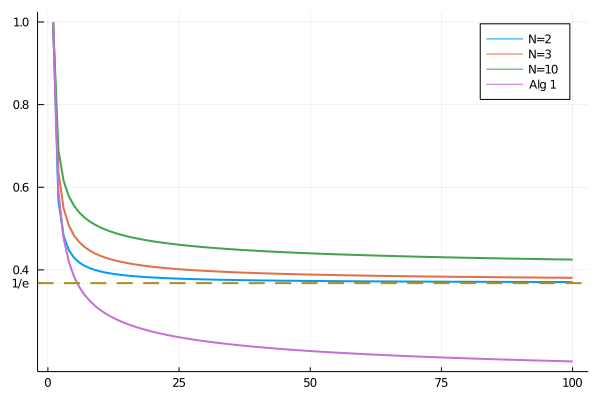

In [52]:
plot(1:100,res2, linewidth = 2, label="N=2",fmt = :png)
plot!(1:100,res3, linewidth = 2, label="N=3",fmt = :png)
plot!(1:100,res10,linewidth = 2, label="N=10",fmt = :png)
plot!(1:100,resx, linewidth = 2, label="Alg 1",fmt = :png)
plot!([0.36788],linetype=:hline, linestyle = :dash, yticks=([0.36788,0.4,0.6,0.8,1.0],["1/e",0.4,0.6,0.8,1.0]),linewidth=2, label = "")

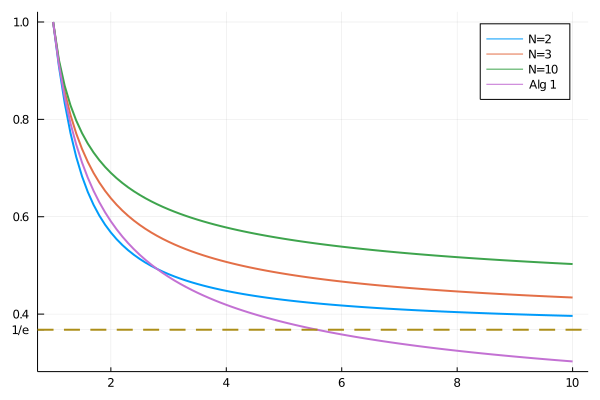

In [53]:
plot(1:0.1:10 ,linewidth = 2, res_sm_2,label="N=2",fmt = :png)
plot!(1:0.1:10 ,linewidth = 2, res_sm_3,label="N=3",fmt = :png)
plot!(1:0.1:10 , linewidth = 2, res_sm_10,label="N=10",fmt = :png)
plot!(1:0.1:10 ,linewidth = 2, res_sm_x,label="Alg 1",fmt = :png)
plot!([0.36788],linetype=:hline, linestyle = :dash, yticks=([0.36788,0.4,0.6,0.8,1.0],["1/e",0.4,0.6,0.8,1.0]),linewidth=2, label = "")

In [54]:
res_sm_2

91-element Array{Any,1}:
 0.9999998885314146
 0.9090929190898096
 0.8337464596629869
 0.7722593221142965
 0.7229135403283182
 0.6832623564340776
 0.6510562943078658
 0.6245376416868003
 0.6023996546156439
 0.5836805263624808
 0.567667642602758
 0.553826940195304
 0.5417525891052642
 ⋮
 0.4000789281580887
 0.3996914060576639
 0.39931309841109464
 0.3989436800012343
 0.39858284125065996
 0.39823028678778416
 0.39788573464150084
 0.39754891547154797
 0.397219571898883
 0.39689745786843506
 0.39658233797968245
 0.396273986939486

In [55]:
lp(2,1.5)


            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (4 variables).
Knitro fixing 3 variables eliminated from the presolve.

Problem Characteristics                                 (   Presolved)
-----------------------
Objective goal:  Maximize
Objective type:  general
Number of variables:                                  5 (           2)
    bounded below only:                               1 (          

0.6832623564340776

In [56]:
lp(3,1.5)


            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (6 variables).
Knitro fixing 3 variables eliminated from the presolve.

Problem Characteristics                                 (   Presolved)
-----------------------
Objective goal:  Maximize
Objective type:  general
Number of variables:                                  7 (           4)
    bounded below only:                               2 (          

0.7394210045983522

In [57]:
r1 = lp(2,1.5)
r2 = lp(3,1.5)
r10 = lp(10,1.5)
r20 = lp(20,1.5)
r100 = lp(100,1.5)
println(r1,",",r2,",",r10,",",r20,",",r100)


            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (4 variables).
Knitro fixing 3 variables eliminated from the presolve.

Problem Characteristics                                 (   Presolved)
-----------------------
Objective goal:  Maximize
Objective type:  general
Number of variables:                                  5 (           2)
    bounded below only:                               1 (          

 1.01-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:9
And data, a 10-element Array{Float64,1}:
 5.140177117909878e-8
 0.022479052276591246
 0.04793689974716403
 0.07379528779895271
 0.09964496104599407
 0.12539084346155863
 0.15104339230687724
 0.1766597108135595
 0.20232209994441755
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (40 variables).
Knitro fixing 3 va

 1.3805883278484605
 1.37550989243664
 1.370415265090395
 1.3653053805148367
 1.3601811247398048
 1.3550433393476908
 1.349892825193614
 1.3447303456935882
 1.3395566297431465
 1.334372374318396
 1.3291782468014481
 1.323974887066542
 1.31876290936377
 1.313542904013494
 1.3083154389437497
 1.303081061087839
 1.2978402976597143
 1.2925936573260508
 1.2873416312437997
 1.2820846940397095
 1.2768233047250532
 1.2715579075056243
 1.2662889325531652
 1.261016796703296
 1.2557419041059208
 1.2504646468343958
 1.2451854054427063
 1.2399045495015364
 1.2346224380738553
 1.2293394201700143
 1.2240558351788107
 1.2187720132658952
 1.2134882757464138
 1.2082049354364952
 1.202922296982815
 1.1976406571751865
 1.192360305237347
 1.1870815230985337
 1.1818045856570867
 1.1765297610263628
 1.1712573107673445
 1.1659874901088796
 1.1607205481563978
 1.1554567280898813
 1.1501962673518167
 1.1449393978257945
 1.1396863460063622
 1.1344373331606938
 1.129192575482583
 1.123952284239248
 1.118716665911

In [58]:
r1=lp(2,3)
r2=lp(3,3)
r10 = lp(10,3)
r20=lp(20,3)
r100=lp(100,3)
println(r1,",",r2,",",r10,",",r20,",",r100)


            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (4 variables).
Knitro fixing 3 variables eliminated from the presolve.

Problem Characteristics                                 (   Presolved)
-----------------------
Objective goal:  Maximize
Objective type:  general
Number of variables:                                  5 (           2)
    bounded below only:                               1 (          

 2.799066726871164
 2.551530091567738
 2.2961961747615183
 2.0451096315920188
 1.8046172732948293
 1.578354002906134
 1.3683321516346856
 1.1754869734766367
 1.01-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:9
And data, a 10-element Array{Float64,1}:
 1.67590846129727e-6
 0.04416279232390619
 0.09048003267174472
 0.1347166573129455
 0.17709280226085272
 0.21822422477822764
 0.2587959568437389
 0.2995295942288808
 0.34121780245539696
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing lines

 2.704722770294729
 2.6815972662162544
 2.658388310450926
 2.635111014042946
 2.6117791175605545
 2.588405185871858
 2.565000764784764
 2.5415765086921485
 2.5181422858225857
 2.4947072659504865
 2.4712799941926398
 2.447868453641524
 2.4244801189487033
 2.401122002501732
 2.3778006944866794
 2.354522397862461
 2.331292959069609
 2.3081178951385657
 2.2850024177394763
 2.261951454618476
 2.238969668788284
 2.216061475779151
 2.193231059206305
 2.170482384869483
 2.1478192135669807
 2.125245112779413
 2.102763467355714
 2.0803774893153912
 2.0580902268640484
 2.035904572709522
 2.013823271748668
 1.991848928193158
 1.9699840121866916
 1.9482308659657872
 1.9265917096064042
 1.9050686463944846
 1.8836636678550067
 1.8623786584695137
 1.8412154001089303
 1.8201755762056282
 1.7992607756889631
 1.7784724966931789
 1.7578121500682151
 1.7372810627034596
 1.716880480677292
 1.696611572246154
 1.67647543068467
 1.6564730769872484
 1.6366054624406863
 1.6168734710764003
 1.5972779220102002
 1.

In [59]:
r1=lp(2,10)
r2=lp(3,10)
r10=lp(10,10)
r20=lp(20,10)
r100=lp(100,10)
println(r1,",",r2,",",r10,",",r20,",",r100)


            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (4 variables).
Knitro fixing 3 variables eliminated from the presolve.

Problem Characteristics                                 (   Presolved)
-----------------------
Objective goal:  Maximize
Objective type:  general
Number of variables:                                  5 (           2)
    bounded below only:                               1 (          

 0.19073193895390683
 0.2411140976120619
 0.28865339369114434
 0.3355205172558712
 0.3839019321507146
 0.4364671706063301
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (40 variables).
Knitro fixing 3 variables eliminated from the presolve.

Problem Characteristics                                 (   Presolved)
-----------------------
Objective goal:  Maximize
Objective type:  general
Number of 

  4.217891202840756
  4.1215961999277075
  4.026911086259524
  3.9338276471645037
  3.8423367796138232
  3.7524285537778823
  3.6640922706988106
  3.5773165164266816
  3.492089213340764
  3.4083976686536492
  3.3262286202615035
  3.2455682800939885
  3.1664023751139414
  3.088716186110816
  3.0124945841018738
  2.9377220656446545
  2.8643827856672166
  2.7924605886073333
  2.721939038097214
  2.652801445116166
  2.5850308948483884
  2.5186102722072543
  2.4535222859898553
  2.3897494916103947
  2.327274312469027
  2.2660790601388525
  2.206145953570128
  2.1474571374071596
  2.089994699385337
  2.0337406867103143
  1.9786771213577419
  1.924786014357883
  1.872049379258686
  1.8204492449641239
  1.7699676680004974
  1.7205867441210252
  1.672288619145962
  1.6250554990152615
  1.578869659099883
  1.5337134528369634
  1.4895693197414384
  1.4464197928276783
  1.404247505461124
  1.3630351976521127
  1.322765721800374
  1.2834220478967058
  1.2449872681863383
  1.2074446012969602
  1.170

In [60]:
r1=lp(2,100)
r2=lp(3,100)
r10=lp(10,100)
r20=lp(20,100)
r100=lp(100,100)
println(r1,",",r2,",",r10,",",r20,",",r100)


            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (4 variables).
Knitro fixing 3 variables eliminated from the presolve.

Problem Characteristics                                 (   Presolved)
-----------------------
Objective goal:  Maximize
Objective type:  general
Number of variables:                                  5 (           2)
    bounded below only:                               1 (          

  53.84923552062663
  35.20447737076116
  21.94388649139598
  13.108167641430487
   7.505481057251252
   4.1010388443031855
   2.1138584059164556
   1.01-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 0:9
And data, a 10-element Array{Float64,1}:
 0.011832497491998387
 0.12018303342426497
 0.19483815432740573
 0.25109137794972114
 0.2981644366057739
 0.3413572691800625
 0.3846461162158274
 0.4322856036992635
 0.49089516939325956
 1.0

            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch fro

  21.454513214739745
  20.5135274922714
  19.60826120133011
  18.737664373854887
  17.90069753461874
  17.09633341070914
  16.32355843677319
  15.581374073469298
  14.86879795508343
  14.184864880934201
  13.52862766398611
  12.899157848999538
  12.29554631155596
  11.71690374839489
  11.1623610686764
  10.631069695030606
  10.12220178256581
   9.634950363374164
   9.168529423491522
   8.722173918732128
   8.295139735324465
   7.886703600818198
   7.496162950310477
   7.12283575264926
   6.7660603009101035
   6.425194971108078
   6.09961795279537
   5.788726954907237
   5.491938889951107
   5.208689539384848
   4.938433202799056
   4.680642333302978
   4.434807161313745
   4.200435308761942
   3.9770513955529334
   3.7641966399614577
   3.5614284544855037
   3.3683200385443066
   3.184459969272807
   3.0094517915406094
   2.842913608206545
   2.684477671509398
   2.5337899763903557
   2.390509856442295
   2.2543095830842375
   2.124873968464813
   2.001899972505044
   1.885096314396729

In [61]:
println(1/(1+log(1)), ",",1/(1+log(1.5)),",", 1/(1+log(3)),",", 1/(1+log(10)),",", 1/(1+log(100)))

1.0,0.7115082361212486,0.4765053580405043,0.30279310656411385,0.1784067150181842


In [62]:
res10_15= lprf(10,1.5)
res10_100=lprf(10,100)


            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (20 variables).
Knitro fixing 3 variables eliminated from the presolve.

Problem Characteristics                                 (   Presolved)
-----------------------
Objective goal:  Maximize
Objective type:  general
Number of variables:                                 21 (          18)
    bounded below only:                               9 (         

(Any[0.011832497491998387, 0.12018303342426497, 0.19483815432740573, 0.25109137794972114, 0.2981644366057739, 0.3413572691800625, 0.3846461162158274, 0.4322856036992635, 0.49089516939325956], Any[100.0, 77.46176930662945, 53.84923552062663, 35.20447737076116, 21.94388649139598, 13.108167641430487, 7.505481057251252, 4.1010388443031855, 2.1138584059164556])

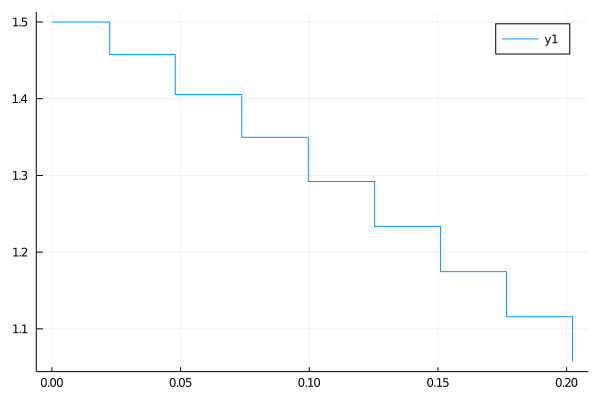

In [63]:
plot(res10_15[1], res10_15[2], linetype=:steppost)


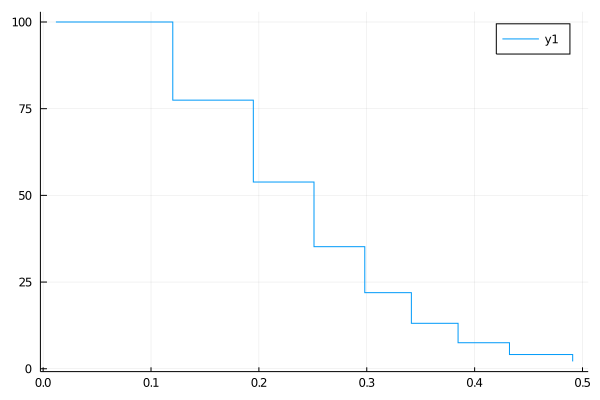

In [64]:
plot(res10_100[1], res10_100[2], linetype=:steppost)


In [65]:
res10_100[2]


9-element Array{Any,1}:
 100.0
  77.46176930662945
  53.84923552062663
  35.20447737076116
  21.94388649139598
  13.108167641430487
   7.505481057251252
   4.1010388443031855
   2.1138584059164556

In [66]:
res100_15= lprf(100,1.5)
res100_100=lprf(100,100)


            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (200 variables).
Knitro fixing 3 variables eliminated from the presolve.

Problem Characteristics                                 (   Presolved)
-----------------------
Objective goal:  Maximize
Objective type:  general
Number of variables:                                201 (         198)
    bounded below only:                              99 (        

(Any[2.2184387893077853e-10, 0.008824563670139202, 0.018559764248533468, 0.028274774439990116, 0.037802117270414035, 0.04708500104558456, 0.05610419508309711, 0.06485660563579447, 0.0733468531977863, 0.08158339370037439  …  0.4823369882168582, 0.48837583738951057, 0.49457588137810726, 0.5009492644411427, 0.5075092814212688, 0.5142705336711951, 0.5212491120046852, 0.5284628125706301, 0.5359313931221628, 0.5436768792314737], Any[100.0, 98.06944791470066, 95.77591814186475, 93.35282065959342, 90.86136386629703, 88.3340978910035, 85.79207609892313, 83.25029500961035, 80.72004456757229, 78.21011878366306  …  1.8850963143967294, 1.7741830887758987, 1.6688913866888746, 1.5689629213581087, 1.4741496586318608, 1.3842134518603944, 1.2989256807738032, 1.218066893732555, 1.1414264524663713, 1.0688021780895318])

In [67]:
res100_3= lprf(100,3)
res100_10= lprf(100,10)


            Student License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.2.2

Knitro presolve eliminated 3 variables and 0 constraints.

datacheck:               0
hessian_no_f:            1
par_numthreads:          1
Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 0.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linesearch from AUTO to 1.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (200 variables).
Knitro fixing 3 variables eliminated from the presolve.

Problem Characteristics                                 (   Presolved)
-----------------------
Objective goal:  Maximize
Objective type:  general
Number of variables:                                201 (         198)
    bounded below only:                              99 (        

(Any[1.0944987716043536e-9, 0.0053935891616325475, 0.011486639275985084, 0.017731422800265042, 0.02401231997651274, 0.03027904848485969, 0.03650519811015441, 0.04267570242707015, 0.04878169698733195, 0.054818016325254765  …  0.42393879394107564, 0.42882418140012957, 0.4337656728971577, 0.4387662961509113, 0.4438292306393373, 0.44895781998240253, 0.454155585529681, 0.45942624130167725, 0.46477371045585125, 0.47020214347416334], Any[10.0, 9.898172018960574, 9.778082435707226, 9.650663681140738, 9.518623827563976, 9.383363007726008, 9.245774481137884, 9.106493528457703, 8.966002863995303, 8.824685798217887  …  1.3630351976521127, 1.322765721800374, 1.2834220478967058, 1.2449872681863383, 1.2074446012969602, 1.1707773958320649, 1.1349691334276162, 1.1000034312668316, 1.065864044044113, 1.0325348653647755])

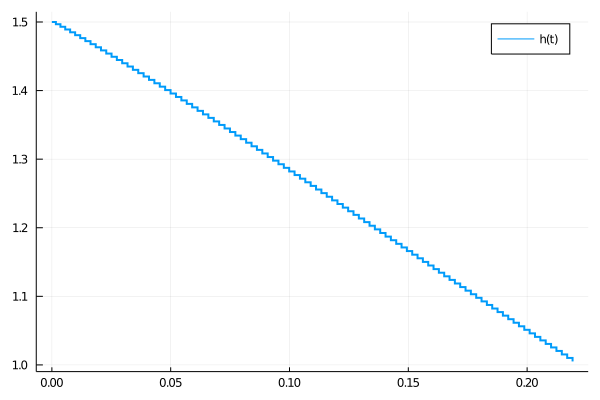

In [68]:
plot(res100_15[1], res100_15[2], linetype=:steppost, fmt = :png, label="h(t)", linewidth = 2)




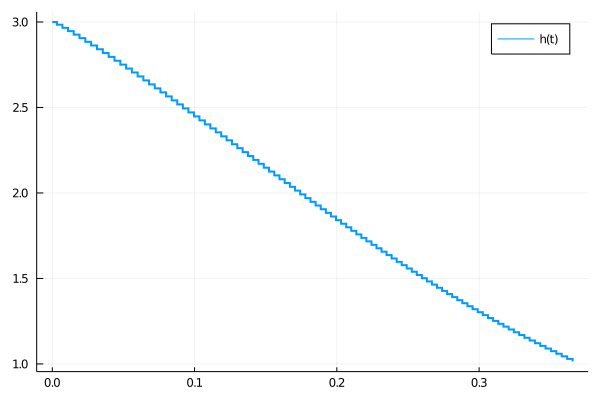

In [69]:
plot(res100_3[1], res100_3[2], linetype=:steppost, fmt = :png, label="h(t)", linewidth = 2)

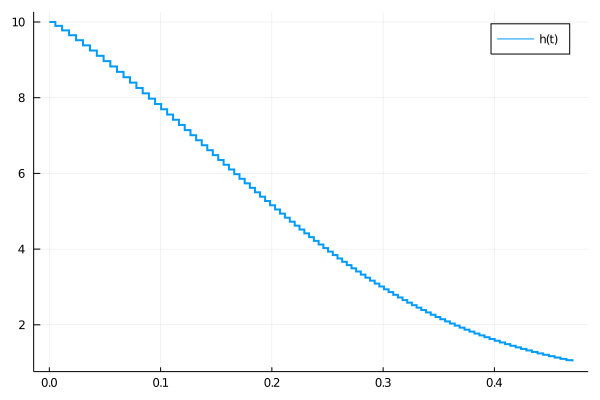

In [70]:
plot(res100_10[1], res100_10[2], linetype=:steppost, fmt = :png, label="h(t)",linewidth = 2)

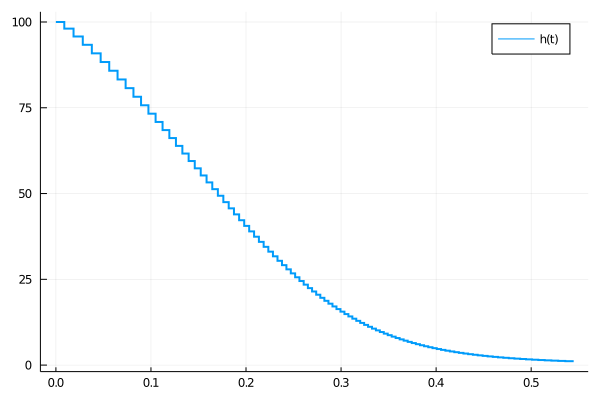

In [71]:
plot(res100_100[1], res100_100[2], linetype=:steppost,fmt = :png, label="h(t)", linewidth = 2)

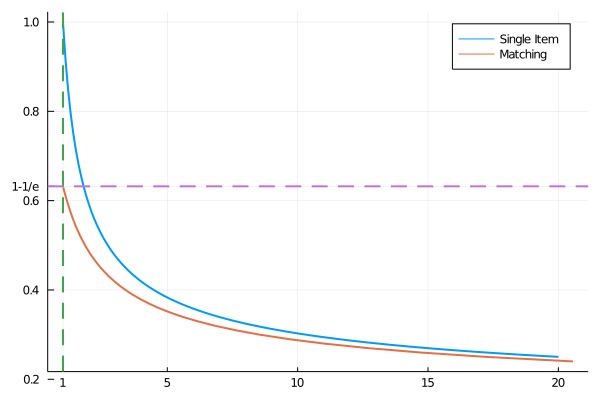

In [72]:
using Plots
res_20_sin = []
for c = 1:0.1:20
    push!(res_20_sin , 1/(1+log(c)))
end
res_20_mat = []
e= 2.71828182846
for y = 0.24:0.01:0.63
    push!(res_20_mat,e^((1+log(1-y))/y))
end
plot([1:0.1:20], res_20_sin, fmt = :png, label="Single Item", linewidth = 2)   
plot!( res_20_mat,0.24:0.01:0.63, fmt = :png, label="Matching", linewidth = 2)   
plot!([1],linetype=:vline, xticks = [1,5,10,15,20], linestyle = :dash, linewidth=2, label = "")
plot!([0.632],linetype=:hline, yticks = ([0.2,0.4,0.6,0.632,0.8,1],["0.2","0.4","0.6","1-1/e","0.8","1.0"]), linestyle = :dash, linewidth=2, label = "")